### XG Boost
Effect of the Learning Rate and estimators on XGBoost

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
# Create Data
data = make_regression(n_samples=1000, n_features=5, n_informative=2, noise=0.6)

df = pd.DataFrame(data[0], columns=['v1', 'v2', 'v3', 'v4', 'v5'])
df['y'] = data[1]
df.head(2)

,v1,v2,v3,v4,v5,y
0,-1.197674,-0.592680,1.537188,0.384558,0.690212,61.308073
1,0.679080,-0.056933,-0.066326,0.142443,-0.232449,-18.183106


In [49]:
# X and Y
X = data[0]
y = data[1]

In [50]:
# Lists of parameters to test
number_estimators = [5,50,100]
learning_rates = [0.1, 0.5, 1]

# Fit different models
for n in number_estimators:
  for lr in learning_rates:
    # Fit
    gbreg = GradientBoostingRegressor(n_estimators=n, learning_rate=lr).fit(X,y)

    # Predict
    df[f'params(n={n},lr={lr})'] = gbreg.predict(X)

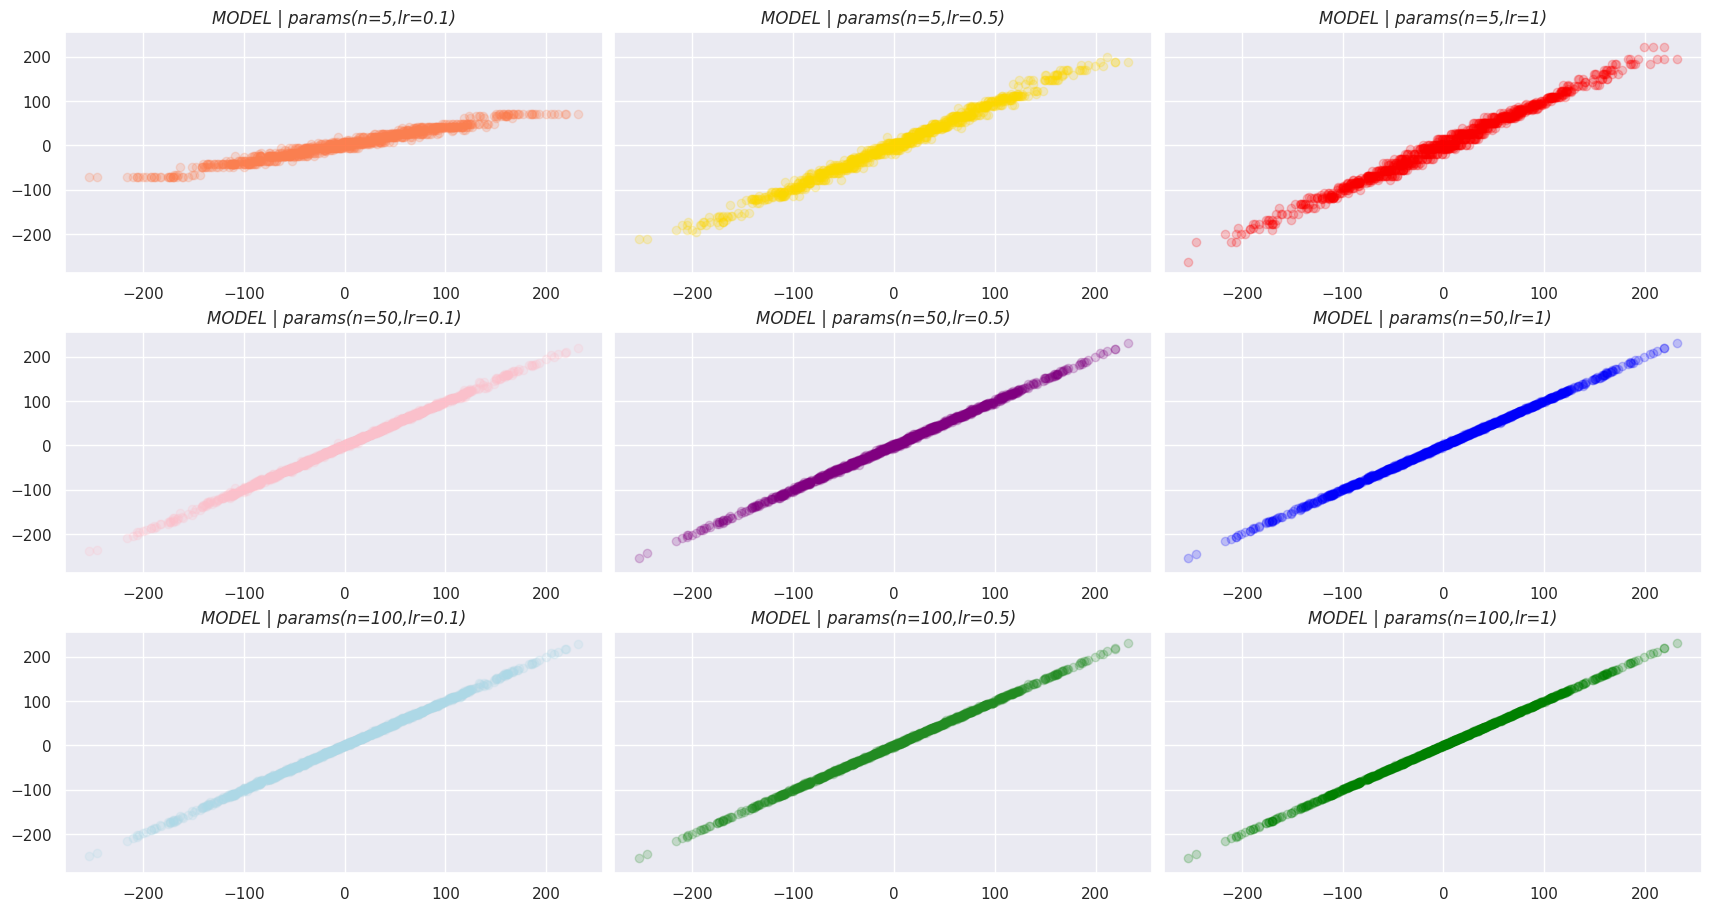

In [53]:
# Plot with Mosaic
fig = plt.figure(layout= 'constrained', figsize=(17,9))
mosaic = fig.subplot_mosaic('''
                            abc
                            def
                            ghi
                            ''', sharey=True)

# Plot A
mosaic['a'].scatter(df.y, df['params(n=5,lr=0.1)'], color='coral', alpha=0.2)

# Plot B
mosaic['b'].scatter(df.y, df['params(n=5,lr=0.5)'], color='gold', alpha=0.2)

# Plot C
mosaic['c'].scatter(df.y, df['params(n=5,lr=1)'], color='red', alpha=0.2)

# Plot D
mosaic['d'].scatter(df.y, df['params(n=50,lr=0.1)'], color='pink', alpha=0.2)

# Plot E
mosaic['e'].scatter(df.y, df['params(n=50,lr=0.5)'], color='purple', alpha=0.2)

# Plot F
mosaic['f'].scatter(df.y, df['params(n=50,lr=1)'], color='blue', alpha=0.2)

# Plot G
mosaic['g'].scatter(df.y, df['params(n=100,lr=0.1)'], color='lightblue', alpha=0.2)

# Plot H
mosaic['h'].scatter(df.y, df['params(n=100,lr=0.5)'], color='forestgreen', alpha=0.2)

# Plot I
mosaic['i'].scatter(df.y, df['params(n=100,lr=1)'], color='green', alpha=0.2)

# Define Titles
titles =  ['MODEL | params(n=5,lr=0.1)', 'MODEL | params(n=5,lr=0.5)', 'MODEL | params(n=5,lr=1)', 'MODEL | params(n=50,lr=0.1)', 'MODEL | params(n=50,lr=0.5)',
 'MODEL | params(n=50,lr=1)', 'MODEL | params(n=100,lr=0.1)', 'MODEL | params(n=100,lr=0.5)', 'MODEL | params(n=100,lr=1)']

# Titles
for ax, g_title in zip(mosaic.items(), titles):
    ax[1].set_title(g_title, fontstyle='italic')


In [52]:
# View final DF
df

,v1,v2,v3,v4,v5,y,"params(n=5,lr=0.1)","params(n=5,lr=0.5)","params(n=5,lr=1)","params(n=50,lr=0.1)","params(n=50,lr=0.5)","params(n=50,lr=1)","params(n=100,lr=0.1)","params(n=100,lr=0.5)","params(n=100,lr=1)"
0,-1.197674,-0.592680,1.537188,0.384558,0.690212,61.308073,24.501317,63.962182,61.833861,60.344316,64.522043,60.616969,60.973017,62.464336,61.168165
1,0.679080,-0.056933,-0.066326,0.142443,-0.232449,-18.183106,-6.754934,-17.367560,-18.567248,-14.896797,-16.344584,-17.436527,-15.054772,-16.841104,-17.663103
2,-0.235654,0.721251,0.011027,1.305156,-0.600382,-29.865309,-17.511634,-38.027758,-44.089672,-29.953034,-30.983087,-31.803118,-29.017271,-30.253071,-29.883383
3,-1.848706,-0.282721,1.137691,-0.074239,0.443140,34.927956,17.738794,36.565685,50.931685,34.308469,36.269824,36.788461,34.884080,34.395651,36.050247
4,-0.477745,-0.944781,1.252195,-1.146109,0.574976,31.173490,17.738794,30.605902,28.593940,28.600761,31.207150,32.038487,28.064021,30.951969,31.613189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.134256,-1.358476,0.104997,1.126424,-1.127981,-74.937076,-35.704024,-78.423690,-73.125510,-78.702477,-76.768114,-76.894526,-78.115189,-75.663648,-75.598793
996,-1.070568,-2.011178,-1.634453,1.932671,0.472426,66.944182,17.738794,57.607586,72.370575,64.792629,67.832606,66.849319,67.004998,67.542448,66.945822
997,-1.078006,-0.378463,-1.074353,-0.285873,0.627849,48.351478,24.501317,44.020919,49.979868,51.745347,44.738691,48.814913,51.837626,45.465758,48.502360
998,1.026361,-0.135813,0.476862,0.984756,1.248361,116.531541,42.488006,116.587208,120.440616,114.680563,120.698334,118.506619,116.614901,118.946344,117.556967
